In [7]:
import re
import numpy as np
import pandas as pd

df1 = pd.read_csv('2010-2020 OCPF.csv')
#df1 = pd.read_csv('OCPF_Police.csv')
index = []
fillter1 = ["Law Enforcement", "Sheriff", "Patrol", "Detective", "Trooper", "Police"]
fillter2 = ["Police"]
for i, row in df1.iterrows():
    valid = False
    for f in fillter1:
        if re.search(f, str(row['Occupation']), flags = re.IGNORECASE) != None:
            valid = True
            break
    for f in fillter2:
        if valid or re.search(f, str(row['Employer']), flags = re.IGNORECASE) != None:
            valid = True
            break
    if valid:
        index.append(True)
    else:
        index.append(False)
df2 = df1[index]
df2.to_csv("./OCPF_Police_Individual.csv")
print(df2.shape)
print(df2.head(5))

(10462, 17)
           Date           Contributor                 Address           City  \
363    1/5/2010      PUDOLSKY, GERALD  2018 WASHINGTON STREET         Canton   
396    1/6/2010     Ainsworth, Gordon             Pine Street     Northfield   
568    1/7/2010  CICCONE, JR, ALLAN L              22 WEST ST  NEWTON CORNER   
951   1/10/2010      LINSKEY, MICHAEL             71 GROVE CR      BRAINTREE   
1255  1/13/2010       Hodgson, Thomas         158 Hathaway Rd      Dartmouth   

     State        Zip                  Occupation  \
363     MA      02021             SPECIAL SHERIFF   
396     MA      01360              Deputy Sheriff   
568     MA  024581326              POLICE OFFICER   
951     MA      02184  BOSTON CITY POLICE OFFICER   
1255    MA      02747                     Sheriff   

                             Employer Principal Officer  Amount  CPF ID  \
363     COMMONWEALTH OF MASSACHUSETTS               NaN   500.0   14188   
396                      Comm OF Mass 

In [11]:
index2 = []
fillter3 = ["Boston School Police Nepba Local 150", "Ma Correction Officers", "MA LAWPAC",\
            "MA State Police Commissioned Officers PAC", "Massachusetts Coalition of Police",\
            "Massachusetts Municipal Police Coalition", "New England Police Benevolent Association",\
            "State Police Assoc of Mass. Pol Action Comm", "MA Correction Officers Federated Union",\
            "State Police Association of Massachusetts"]
fillter4 = ["Boston Police"]
fillter5 = "Union/Association"
for i, row in df1.iterrows():
    valid = False
    for f in fillter3:
        if re.search(f, str(row['Contributor']), flags = re.IGNORECASE) != None:
            valid = True
            break
    for f in fillter4:
        if valid or str(row['Contributor']).startswith(f):
            valid = True
            break
    if valid and re.search(fillter5, str(row['Record Type Description']), flags = re.IGNORECASE) != None:
        index2.append(True)
    else:
        index2.append(False)
df3 = df1[index2]
df3.to_csv("./OCPF_Police_Union.csv")
print(df3.shape)
print(df3.head(5))

(310, 17)
            Date                                 Contributor  \
13834  2/24/2010   STATE POLICE ASSOCIATION OF MASSACHUSETTS   
22993  3/10/2010    MASSACHUSETTS MUNICIPAL POLICE COALITION   
25507  3/15/2010  Boston Police Superior Officers Federation   
26829  3/17/2010  Boston Police Superior Officers Federation   
27961  3/18/2010   STATE POLICE ASSOCIATION OF MASSACHUSETTS   

                            Address          City State    Zip Occupation  \
13834         2 MOUNT ROYAL AVE 510   MARLBOROUGH    MA  01752  TREASURER   
22993  153 CARDAVILLE RD, SUITE 210  SOUTHBOROUGH    MA  01722        NaN   
25507           413 Neponset Avenue        Boston    MA  02122        NaN   
26829           413 Neponset Avenue        Boston    MA  02122        NaN   
27961  2 MOUNT ROYAL AVE, SUITE 510      MARLBORO    MA  01752        NaN   

                                            Employer       Principal Officer  \
13834  STATE POLICE ASSOCIATION OF MASSACHUSETTS PAC          

In [1]:
import re
import numpy as np
import pandas as pd

df1 = pd.read_csv('2010-2020 OCPF.csv')
df2 = pd.read_csv('OCPF_Police_Individual.csv')
df3 = pd.read_csv('OCPF_Police_Union.csv')

In [2]:
idlist = df1["CPF ID"].values.tolist()
namelist = df1["Recipient"].values.tolist()
dict0 = {}
tmp = 0
for key in idlist:
    dict0[key] = namelist[tmp]
    tmp += 1
print(dict0)

{95359: 'MA Coalition for Our Communities', 13623: 'Jain, Kamal', 14920: 'Pressley, Ayanna', 15012: 'Cutler, Josh', 13866: 'Webster, Daniel K.', 80840: 'Lawrence Teachers Union Committee on Political Action', 76490: 'Sandwich REPTC', 70199: 'Gloucester DEMCC', 14744: 'Clark, Katherine', 14991: 'Guardia, Anthony', 14542: 'Sandlin, Rosemary', 10315: 'Moore, Richard T.', 14975: 'Day, Michael S.', 14993: 'Dixon, James E.', 15061: 'Brodeur, Paul', 13048: "O'Flaherty, Eugene L.", 12258: 'Flavin, Nancy A.', 80823: 'New England Police Benevolent Association, Inc. Political Action Committee', 12185: 'Jacques, Cheryl Ann', 10403: 'Speliotis, Theodore C.', 15008: 'Wentworth, Jason', 80652: 'Floorcoverers L.U. 2168 PAC', 13249: 'deMacedo, Vinny', 11155: 'Rosenberg, Stanley C.', 13769: 'Perotto, Mike C.', 13951: 'Peisch, Alice Hanlon', 80230: 'Plumbers Union Local #12 PAC', 15009: 'Lucas, David R.', 13833: 'Perry, Jeffrey', 14814: 'Arciero, Jim', 13237: 'Balser, Ruth B.', 14998: 'Barnet, Margot', 1

In [3]:
list1 = [14454, 14571, 11916, 15444, 15901, 15729]
dict1 = {}
for key in list1:
    dict1[key] = 0
for i, row in df1.iterrows():
    if row['CPF ID'] in dict1.keys():
        dict1[row['CPF ID']] += row['Amount']
print(dict1)

dict2 = {}
for key in list1:
    dict2[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in dict2.keys():
        dict2[row['CPF ID']] += row['Amount']
print(dict2)

dict3 = {}
for key in list1:
    dict3[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in dict3.keys():
        dict3[row['CPF ID']] += row['Amount']
print(dict3)

df4 = df2
pd.concat([df4, df3], axis = 0)
dict4 = {}
for key in list1:
    dict4[key] = 0
for i, row in df4.iterrows():
    if row['CPF ID'] in dict4.keys():
        dict4[row['CPF ID']] += row['Amount']
print(dict4)

{14454: 609958.86, 14571: 414080.43999999994, 11916: 670221.8699999999, 15444: 495189.0, 15901: 52975.86, 15729: 303269.97}
{14454: 200.0, 14571: 200.0, 11916: 3250.0, 15444: 125.0, 15901: 0, 15729: 15375.0}
{14454: 0, 14571: 0, 11916: 0, 15444: 0, 15901: 0, 15729: 0}
{14454: 200.0, 14571: 200.0, 11916: 3250.0, 15444: 125.0, 15901: 0, 15729: 15375.0}


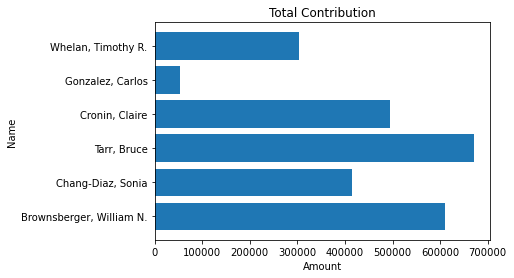

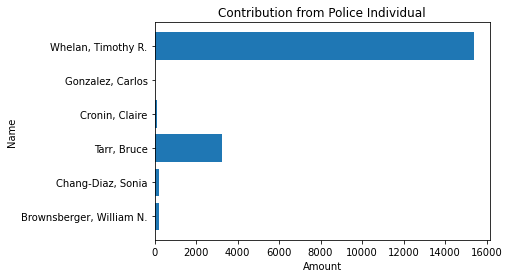

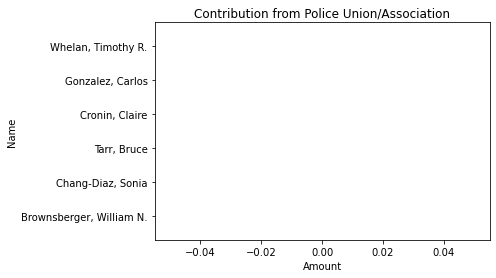

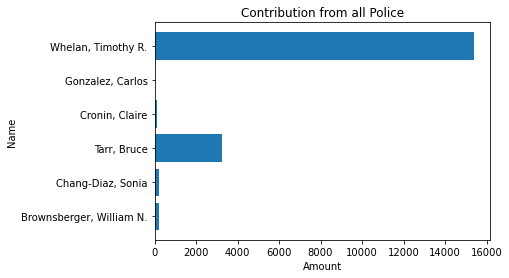

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
b = ax.barh(range(len(dict1)), dict1.values())
ax.set_yticks(range(len(dict1)))
ax.set_yticklabels(dict0[k] for k in dict1.keys())
plt.title("Total Contribution")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict2)), dict2.values())
ax.set_yticks(range(len(dict2)))
ax.set_yticklabels(dict0[k] for k in dict2.keys())
plt.title("Contribution from Police Individual")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict3)), dict3.values())
ax.set_yticks(range(len(dict3)))
ax.set_yticklabels(dict0[k] for k in dict3.keys())
plt.title("Contribution from Police Union/Association")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots()
b = ax.barh(range(len(dict4)), dict4.values())
ax.set_yticks(range(len(dict4)))
ax.set_yticklabels(dict0[k] for k in dict4.keys())
plt.title("Contribution from all Police")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

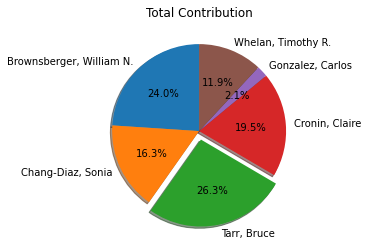

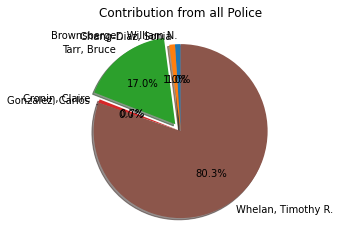

In [7]:
indic = []

for value in dict1.values():
    if value == max(dict1.values()):
        indic.append(0.1)
    else:
        indic.append(0)

plt.pie(
    dict1.values(),
    labels = [dict0[k] for k in dict1.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Total Contribution")
plt.show()

indic2 = []

for value in dict4.values():
    if value == max(dict4.values()):
        indic2.append(0.1)
    else:
        indic2.append(0)

plt.pie(
    dict4.values(),
    labels = [dict0[k] for k in dict4.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Contribution from all Police")
plt.show()

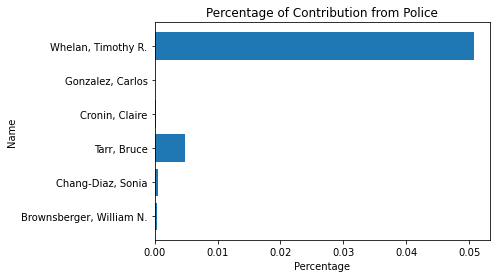

In [14]:
dict9 = dict4.copy()
for key in dict9.keys():
    dict9[key] /= dict1[key]

fig, ax = plt.subplots()
b = ax.barh(range(len(dict9)), dict9.values())
ax.set_yticks(range(len(dict9)))
ax.set_yticklabels(dict0[k] for k in dict9.keys())
plt.title("Percentage of Contribution from Police")
plt.xlabel("Percentage")
plt.ylabel("Name")
plt.show()

In [10]:
list2 = [14543, 13284, 17028, 15976, 17505, 15977, 15123, 15066, 15177, 15158, 13597, 11859, 12563, 10598, 12600, 16905, 16878, \
        16962, 17016, 15297, 15107, 15577, 16293, 14410, 13724, 13338, 11102, 12889, 17043, 12242, 10389, 15093, 15060, 13645, \
        16291, 15488, 12534, 12623, 13455, 13579, 13110, 14561, 15775, 14831, 14535, 15089, 15904, 17361, 17372, 15706, 15011, \
        15055, 15777, 14990, 14265, 15041, 15930, 13568, 15527, 14232, 15809, 15422, 15779, 15806, 16927, 14168, 15877, 16980, \
        15025, 15729, 15174, 15463]
#There're 2 Cahills (15976 and 17505), 2 Goldens (10598, 12600), 3 Dooleys (17361, 17372, 15706), 2 Harringtons (15777, 14990),
#2 Kanes (15930, 13568)

dict5 = {}
for key in list2:
    dict5[key] = 0
for i, row in df1.iterrows():
    if row['CPF ID'] in dict5.keys():
        dict5[row['CPF ID']] += row['Amount']
print(dict5)

dict6 = {}
for key in list2:
    dict6[key] = 0
for i, row in df2.iterrows():
    if row['CPF ID'] in dict6.keys():
        dict6[row['CPF ID']] += row['Amount']
print(dict6)

dict7 = {}
for key in list2:
    dict7[key] = 0
for i, row in df3.iterrows():
    if row['CPF ID'] in dict7.keys():
        dict7[row['CPF ID']] += row['Amount']
print(dict7)

dict8 = {}
for key in list2:
    dict8[key] = 0
for i, row in df4.iterrows():
    if row['CPF ID'] in dict8.keys():
        dict8[row['CPF ID']] += row['Amount']
print(dict8)

{14543: 136080.98, 13284: 278224.5, 17028: 174213.75999999998, 15976: 144195.03000000003, 17505: 1005.0, 15977: 116758.45, 15123: 528055.24, 15066: 412387.85000000003, 15177: 378428.8, 15158: 305064.56, 13597: 408792.10000000003, 11859: 108793.23999999999, 12563: 126571.0, 10598: 1506.4900000000002, 12600: 588711.24, 16905: 86916.0, 16878: 55043.36, 16962: 177335.0, 17016: 75269.45, 15297: 282226.28, 15107: 241599.0899999999, 15577: 200258.0, 16293: 286984.29000000004, 14410: 159519.52000000002, 13724: 324426.91, 13338: 553970.04, 11102: 366658.6399999996, 12889: 523938.86, 17043: 26800.0, 12242: 330645.30000000005, 10389: 182108.09000000003, 15093: 443377.16000000003, 15060: 370417.4799999999, 13645: 406009.57, 16291: 131644.24, 15488: 158874.88999999998, 12534: 561013.2400000001, 12623: 193217.04, 13455: 120204.96999999999, 13579: 173530.27000000002, 13110: 171366.96000000005, 14561: 110652.96, 15775: 74835.82, 14831: 180258.18, 14535: 351478.0, 15089: 264432.02, 15904: 209719.4, 173

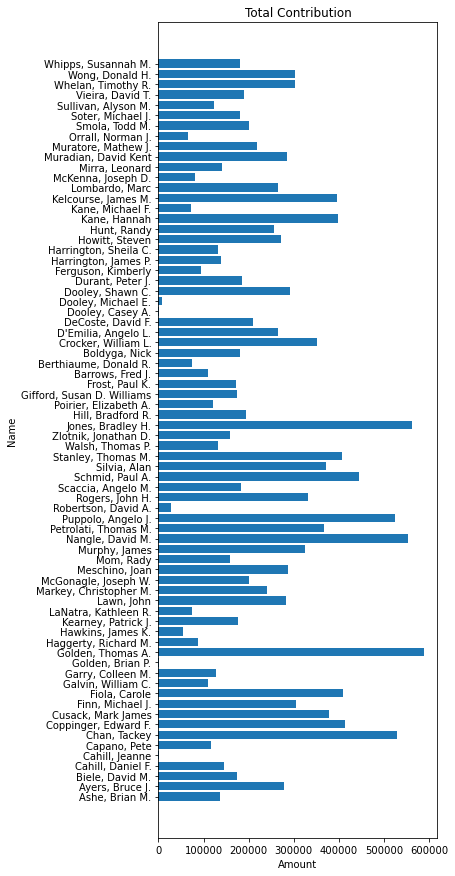

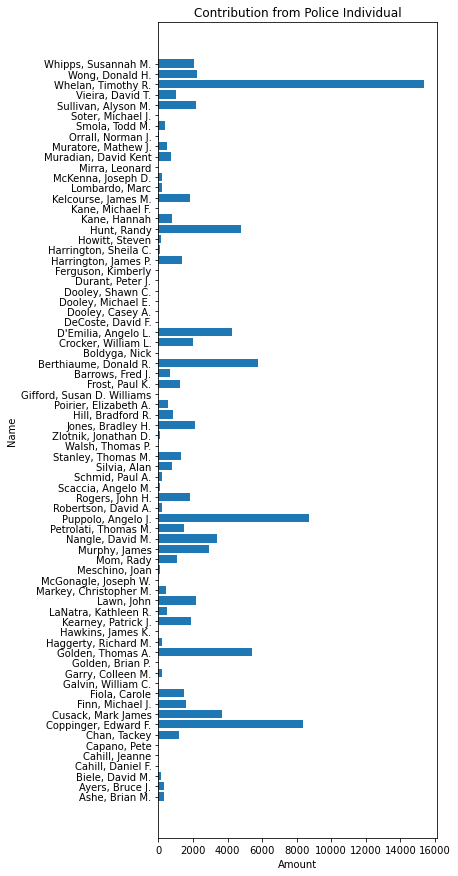

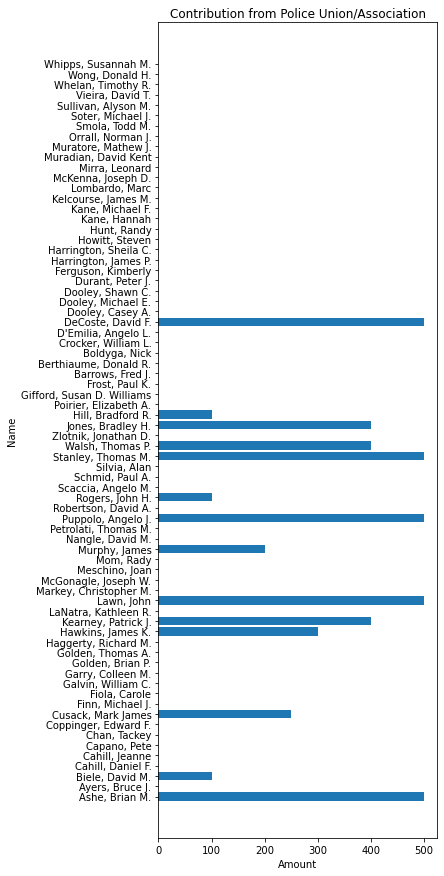

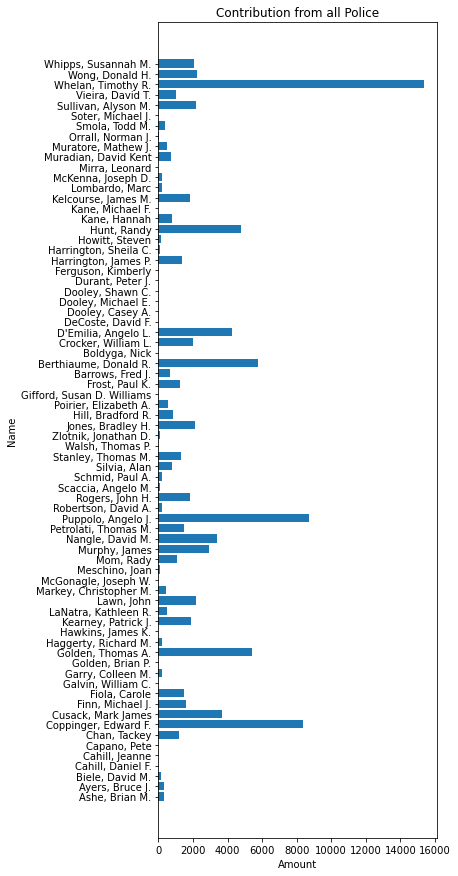

In [12]:
fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict5)), dict5.values())
ax.set_yticks(range(len(dict5)))
ax.set_yticklabels(dict0[k] for k in dict5.keys())
plt.title("Total Contribution")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict6)), dict6.values())
ax.set_yticks(range(len(dict6)))
ax.set_yticklabels(dict0[k] for k in dict6.keys())
plt.title("Contribution from Police Individual")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict7)), dict7.values())
ax.set_yticks(range(len(dict7)))
ax.set_yticklabels(dict0[k] for k in dict7.keys())
plt.title("Contribution from Police Union/Association")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict8)), dict8.values())
ax.set_yticks(range(len(dict8)))
ax.set_yticklabels(dict0[k] for k in dict8.keys())
plt.title("Contribution from all Police")
plt.xlabel("Amount")
plt.ylabel("Name")
plt.show()

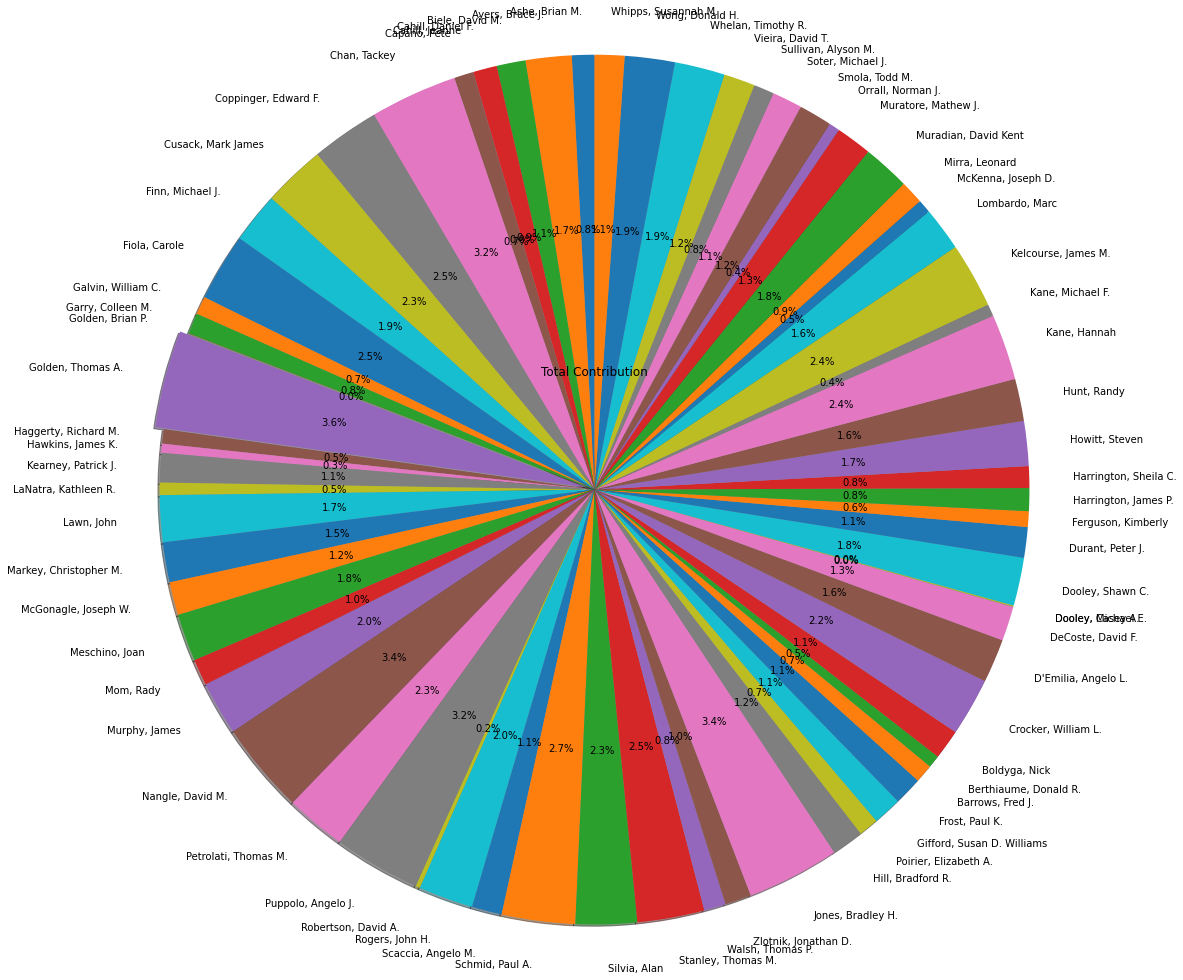

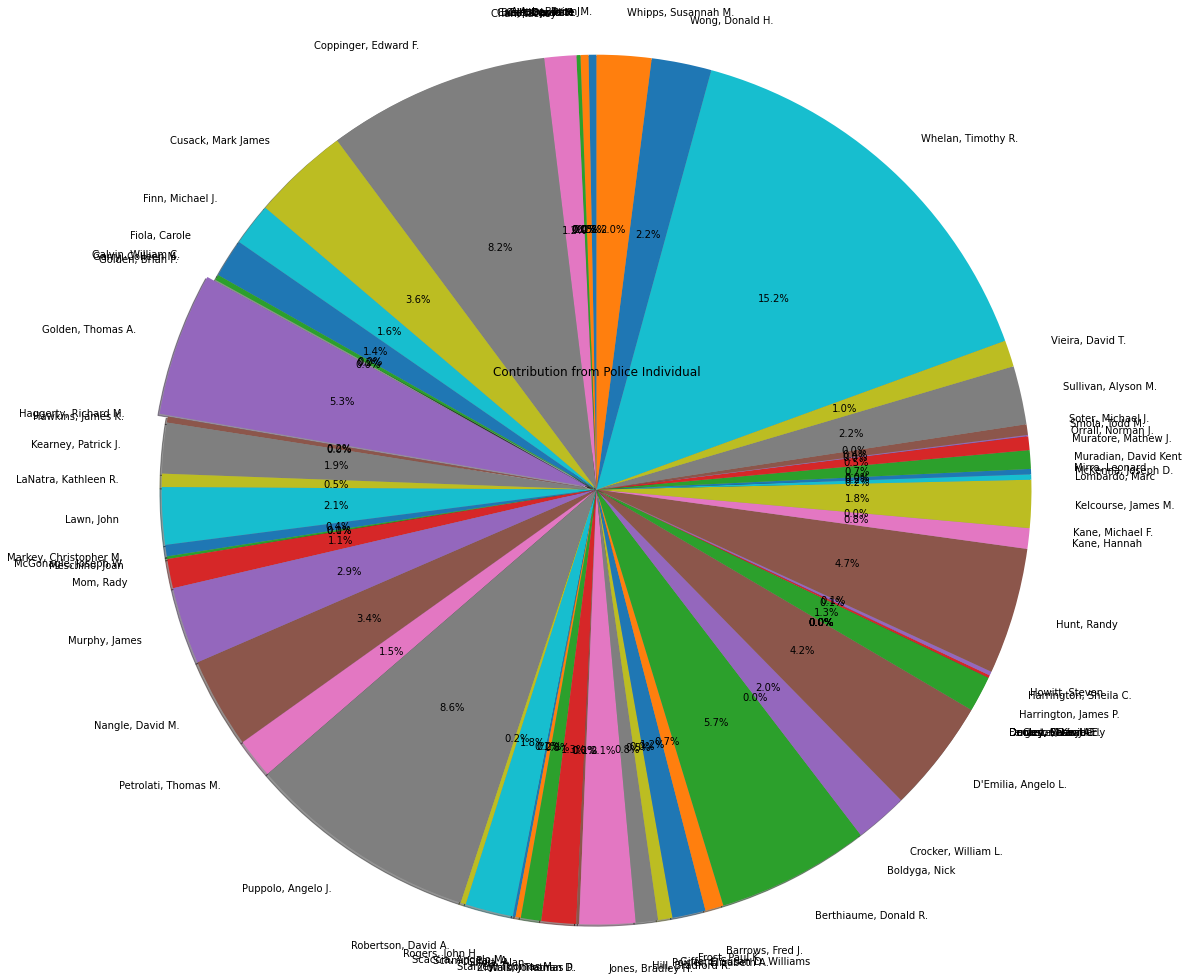

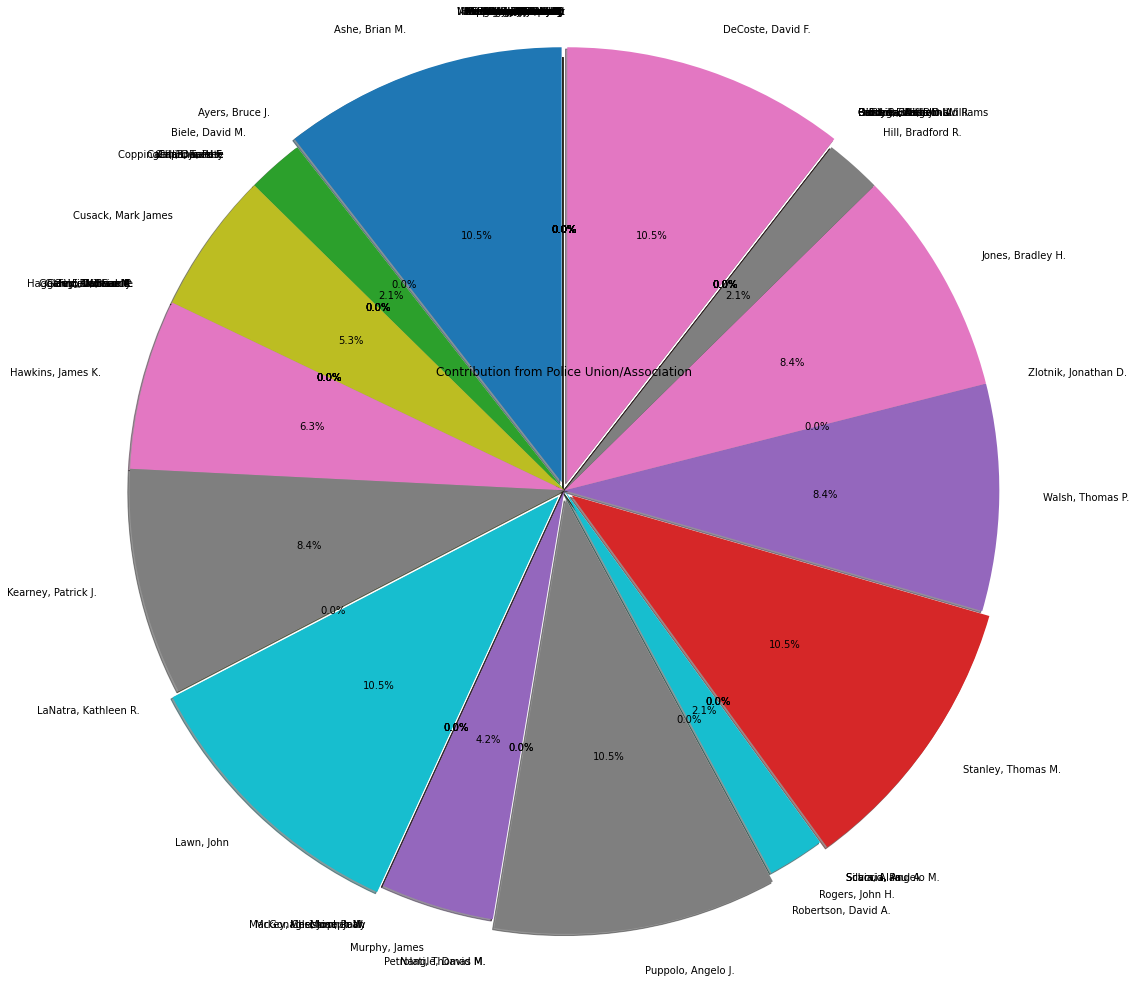

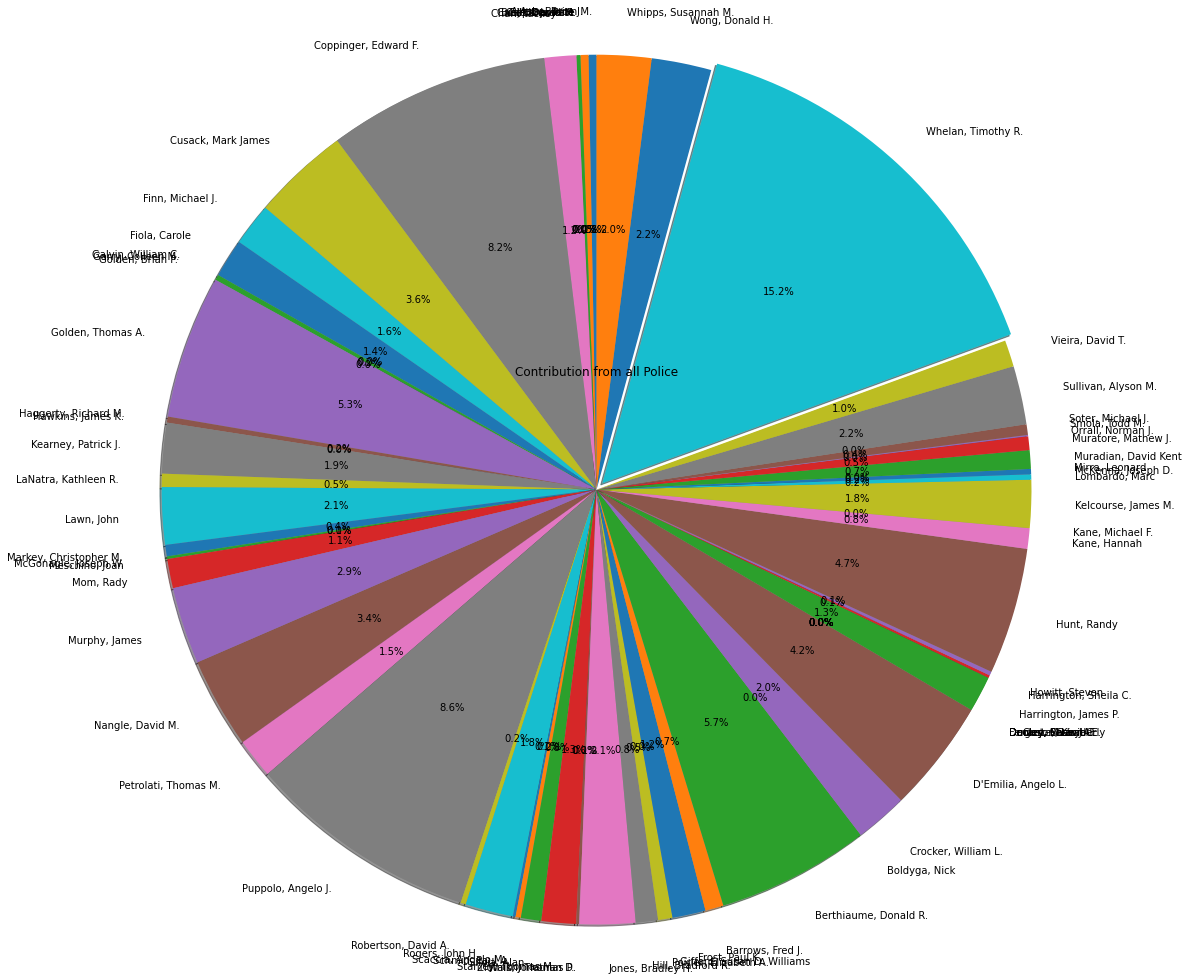

In [13]:
indic = []
for value in dict5.values():
    if value == max(dict5.values()):
        indic.append(0.1)
    else:
        indic.append(0)
plt.pie(
    dict5.values(),
    radius = 5,
    labels = [dict0[k] for k in dict5.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Total Contribution")
plt.show()

indic2 = []
for value in dict6.values():
    if value == max(dict6.values()):
        indic2.append(0.1)
    else:
        indic2.append(0)
plt.pie(
    dict6.values(),
    radius = 5,
    labels = [dict0[k] for k in dict6.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic),
    autopct = '%1.1f%%'
)
plt.title("Contribution from Police Individual")
plt.show()

indic3 = []
for value in dict7.values():
    if value == max(dict7.values()):
        indic3.append(0.1)
    else:
        indic3.append(0)
plt.pie(
    dict7.values(),
    radius = 5,
    labels = [dict0[k] for k in dict7.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic3),
    autopct = '%1.1f%%'
)
plt.title("Contribution from Police Union/Association")
plt.show()

indic4 = []
for value in dict8.values():
    if value == max(dict8.values()):
        indic4.append(0.1)
    else:
        indic4.append(0)

plt.pie(
    dict8.values(),
    radius = 5,
    labels = [dict0[k] for k in dict8.keys()],
    startangle = 90,
    shadow = True,
    explode = tuple(indic4),
    autopct = '%1.1f%%'
)
plt.title("Contribution from all Police")
plt.show()

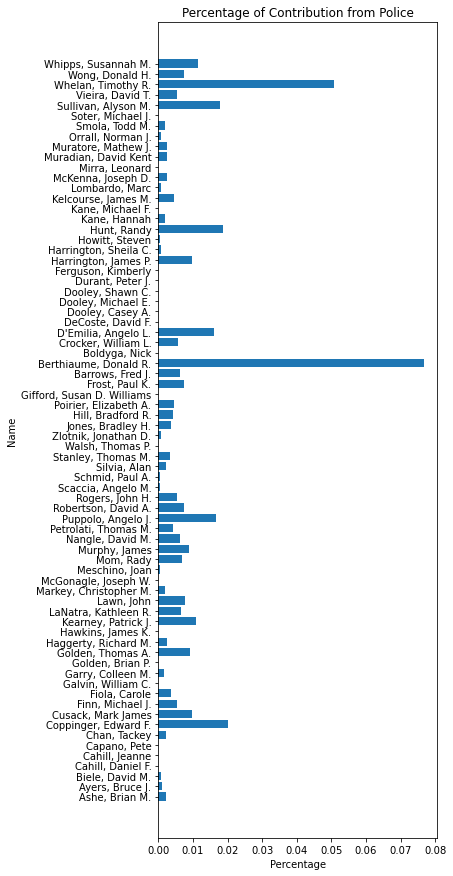

In [15]:
dict10 = dict8.copy()
for key in dict10.keys():
    dict10[key] /= dict5[key]

fig, ax = plt.subplots(figsize = (5, 15))
b = ax.barh(range(len(dict10)), dict10.values())
ax.set_yticks(range(len(dict10)))
ax.set_yticklabels(dict0[k] for k in dict10.keys())
plt.title("Percentage of Contribution from Police")
plt.xlabel("Percentage")
plt.ylabel("Name")
plt.show()

In [32]:
list1 = [14454, 14571, 11916, 15444, 15901, 15729]
dict11 = {}
dict_list1 = []
dict_list2 = []
dict_list3 = []
dict_list4 = []
dict_cur1 = []
dict_cur2 = []
dict_cur3 = []
dict_cur4 = []

i0 = 0
for id in list1:
    dict11[id] = i0
    dict_list1.append({})
    dict_list2.append({})
    dict_list3.append({})
    dict_list4.append({})
    '''dict_list1[i0][time.strptime('1/1/2020', "%m/%d/%Y")] = 0
    dict_list2[i0][time.strptime('1/1/2020', "%m/%d/%Y")] = 0
    dict_list3[i0][time.strptime('1/1/2020', "%m/%d/%Y")] = 0
    dict_list4[i0][time.strptime('1/1/2020', "%m/%d/%Y")] = 0'''
    dict_list1[i0]['1/1/2020'] = 0
    dict_list2[i0]['1/1/2020'] = 0
    dict_list3[i0]['1/1/2020'] = 0
    dict_list4[i0]['1/1/2020'] = 0
    dict_cur1.append(0)
    dict_cur2.append(0)
    dict_cur3.append(0)
    dict_cur4.append(0)
    i0 += 1

for i, row in df1.iterrows():
    if row['CPF ID'] in list1:
        dict_cur1[dict11[row['CPF ID']]] += row['Amount']
        #dict_list1[dict11[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur1[dict11[row['CPF ID']]]
        dict_list1[dict11[row['CPF ID']]][row['Date']] = dict_cur1[dict11[row['CPF ID']]]

for i, row in df2.iterrows():
    if row['CPF ID'] in list1:
        dict_cur2[dict11[row['CPF ID']]] += row['Amount']
        #dict_list2[dict11[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur2[dict11[row['CPF ID']]]
        dict_list2[dict11[row['CPF ID']]][row['Date']] = dict_cur2[dict11[row['CPF ID']]]

for i, row in df3.iterrows():
    if row['CPF ID'] in list1:
        dict_cur3[dict11[row['CPF ID']]] += row['Amount']
        #dict_list3[dict11[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur3[dict11[row['CPF ID']]]
        dict_list3[dict11[row['CPF ID']]][row['Date']] = dict_cur3[dict11[row['CPF ID']]]
        
df4 = df2
pd.concat([df4, df3], axis = 0)
for i, row in df4.iterrows():
    if row['CPF ID'] in list1:
        dict_cur4[dict11[row['CPF ID']]] += row['Amount']
        #dict_list4[dict11[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur4[dict11[row['CPF ID']]]
        dict_list4[dict11[row['CPF ID']]][row['Date']] = dict_cur4[dict11[row['CPF ID']]]

print(dict11)
print(dict_list1)
print(dict_list2)
print(dict_list3)
print(dict_list4)

{14454: 0, 14571: 1, 11916: 2, 15444: 3, 15901: 4, 15729: 5}
[{'1/1/2020': 0, '1/12/2010': 30.0, '1/15/2010': 280.0, '3/5/2010': 2680.0, '3/6/2010': 2880.0, '3/7/2010': 3455.0, '3/8/2010': 4105.0, '3/9/2010': 4305.0, '3/10/2010': 4505.0, '3/11/2010': 5205.0, '3/13/2010': 5355.0, '3/14/2010': 5505.0, '3/20/2010': 6005.0, '3/22/2010': 6505.0, '3/25/2010': 6605.0, '4/9/2010': 6955.0, '4/10/2010': 6970.0, '4/12/2010': 7245.0, '4/15/2010': 7345.0, '4/17/2010': 7445.0, '4/28/2010': 7645.0, '5/4/2010': 9245.0, '5/5/2010': 9345.0, '5/10/2010': 9370.0, '5/11/2010': 10795.0, '5/18/2010': 11545.0, '5/19/2010': 11795.0, '5/20/2010': 11995.0, '5/22/2010': 12170.0, '5/24/2010': 12670.0, '5/25/2010': 12920.0, '5/28/2010': 13020.0, '5/30/2010': 13120.0, '6/3/2010': 13220.0, '6/5/2010': 13280.0, '6/7/2010': 13530.0, '6/11/2010': 13700.0, '6/14/2010': 14100.0, '6/16/2010': 14600.0, '6/19/2010': 14850.0, '6/23/2010': 14950.0, '6/27/2010': 15600.0, '6/29/2010': 15900.0, '6/30/2010': 16075.0, '7/1/2010': 1

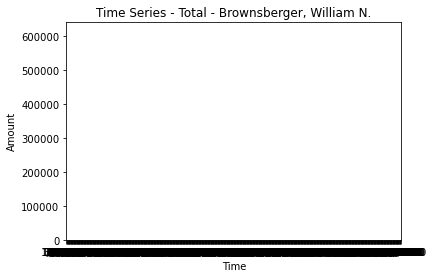

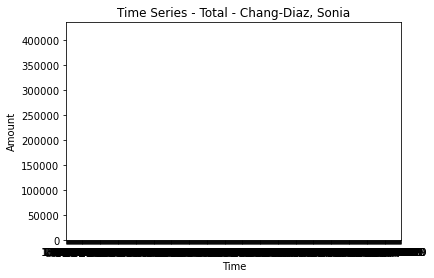

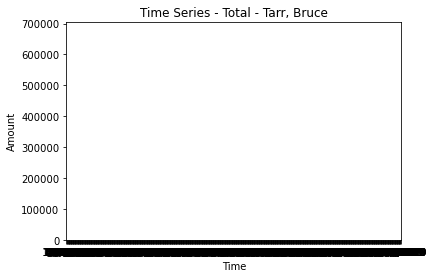

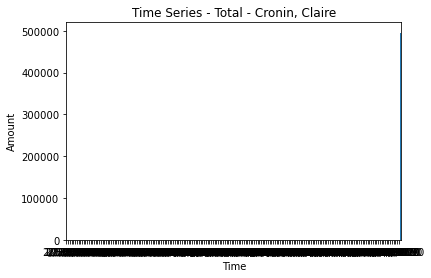

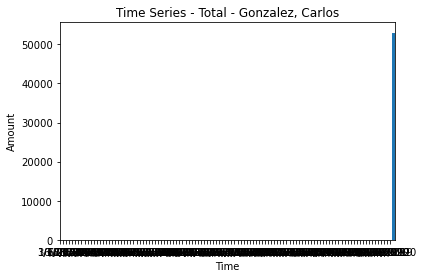

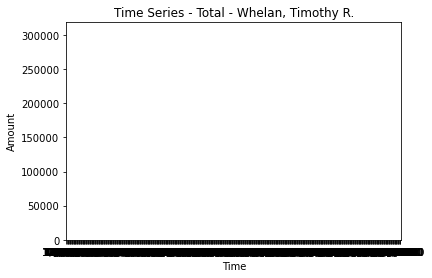

In [40]:
import matplotlib.pyplot as plt

list11 = [int(k) for k in dict11.keys()]

for i in range(len(list1)):
    fig, ax = plt.subplots()
    b = ax.plot(len(dict_list1[i]), dict_list1[i].values())
    ax.set_xticks(range(len(dict_list1[i])))
    ax.set_xticklabels(k for k in dict_list1[i].keys())
    plt.title("Time Series - Total - " + dict0[list11[i]])
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.show()

TypeError: float() argument must be a string or a number, not 'dict_values'

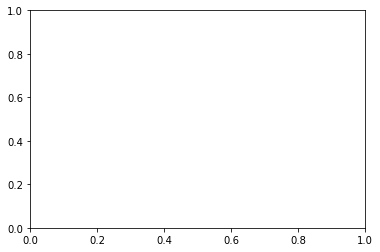

In [42]:
for i in range(len(list1)):
    fig, ax = plt.subplots()
    b = ax.plot(len(dict_list2[i]), dict_list2[i].values())
    ax.set_xticks(range(len(dict_list2[i])))
    ax.set_xticklabels(k for k in dict_list2[i].keys())
    plt.title("Time Series - Individual - " + dict0[list11[i]])
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.show()

TypeError: float() argument must be a string or a number, not 'dict_values'

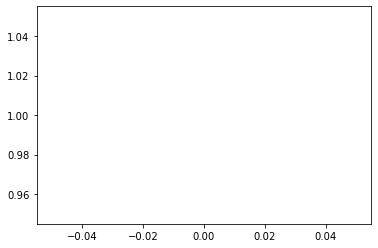

In [41]:
for i in range(len(list1)):
    fig, ax = plt.subplots()
    b = ax.plot(len(dict_list3[i]), dict_list3[i].values())
    ax.set_xticks(range(len(dict_list3[i])))
    ax.set_xticklabels(k for k in dict_list3[i].keys())
    plt.title("Time Series - Individual - " + dict0[list11[i]])
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.show()

In [ ]:
for i in range(len(list1)):
    fig, ax = plt.subplots()
    b = ax.plot(len(dict_list4[i]), dict_list4[i].values())
    ax.set_xticks(range(len(dict_list4[i])))
    ax.set_xticklabels(k for k in dict_list4[i].keys())
    plt.title("Time Series - Individual - " + dict0[list11[i]])
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.show()

In [ ]:
list2 = [14543, 13284, 17028, 15976, 17505, 15977, 15123, 15066, 15177, 15158, 13597, 11859, 12563, 10598, 12600, 16905, 16878, \
        16962, 17016, 15297, 15107, 15577, 16293, 14410, 13724, 13338, 11102, 12889, 17043, 12242, 10389, 15093, 15060, 13645, \
        16291, 15488, 12534, 12623, 13455, 13579, 13110, 14561, 15775, 14831, 14535, 15089, 15904, 17361, 17372, 15706, 15011, \
        15055, 15777, 14990, 14265, 15041, 15930, 13568, 15527, 14232, 15809, 15422, 15779, 15806, 16927, 14168, 15877, 16980, \
        15025, 15729, 15174, 15463]
#There're 2 Cahills (15976 and 17505), 2 Goldens (10598, 12600), 3 Dooleys (17361, 17372, 15706), 2 Harringtons (15777, 14990),
#2 Kanes (15930, 13568)
dict12 = {}
dict_list5 = []
dict_list6 = []
dict_list7 = []
dict_list8 = []
dict_cur5 = []
dict_cur6 = []
dict_cur7 = []
dict_cur8 = []

i1 = 0
for id in list1:
    dict11[id] = i1
    dict_list5.append({})
    dict_list6.append({})
    dict_list7.append({})
    dict_list8.append({})
    '''dict_list5[i1][time.strptime('1/1/2020', "%m/%d/%Y")] = 0
    dict_list6[i1][time.strptime('1/1/2020', "%m/%d/%Y")] = 0
    dict_list7[i1][time.strptime('1/1/2020', "%m/%d/%Y")] = 0
    dict_list8[i1][time.strptime('1/1/2020', "%m/%d/%Y")] = 0'''
    dict_list5[i1]['1/1/2020'] = 0
    dict_list6[i1]['1/1/2020'] = 0
    dict_list7[i1]['1/1/2020'] = 0
    dict_list8[i1]['1/1/2020'] = 0
    dict_cur5.append(0)
    dict_cur6.append(0)
    dict_cur7.append(0)
    dict_cur8.append(0)
    i1 += 1

for i, row in df1.iterrows():
    if row['CPF ID'] in list1:
        dict_cur5[dict12[row['CPF ID']]] += row['Amount']
        #dict_list5[dict12[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur5[dict12[row['CPF ID']]]
        dict_list5[dict12[row['CPF ID']]][row['Date']] = dict_cur5[dict12[row['CPF ID']]]

for i, row in df2.iterrows():
    if row['CPF ID'] in list1:
        dict_cur6[dict12[row['CPF ID']]] += row['Amount']
        #dict_list6[dict12[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur6[dict12[row['CPF ID']]]
        dict_list6[dict12[row['CPF ID']]][row['Date']] = dict_cur6[dict12[row['CPF ID']]]

for i, row in df3.iterrows():
    if row['CPF ID'] in list1:
        dict_cur7[dict12[row['CPF ID']]] += row['Amount']
        #dict_list7[dict12[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur7[dict12[row['CPF ID']]]
        dict_list7[dict12[row['CPF ID']]][row['Date']] = dict_cur7[dict12[row['CPF ID']]]
        
for i, row in df4.iterrows():
    if row['CPF ID'] in list1:
        dict_cur8[dict12[row['CPF ID']]] += row['Amount']
        #dict_list8[dict12[row['CPF ID']]][time.mktime(time.strptime(row['Date'], "%m/%d/%Y"))] = dict_cur8[dict12[row['CPF ID']]]
        dict_list8[dict12[row['CPF ID']]][row['Date']] = dict_cur8[dict12[row['CPF ID']]]

print(dict12)
print(dict_list5)
print(dict_list6)
print(dict_list7)
print(dict_list8)